# 0. Introducción


El problema de clasificacion de patrones es conocido en el área de Inteligencia Artificial y se sabe que no hay una solucion universal para todo tipo de problemas, puesto que esto depende de la distribucion de los datos. La idea es encontrar una funcion que sea capaz de clasificar valores nuevos, y esta funcion puede ser lineal como no serlo.

Anteriormente habiamos visto el modelo de Bayes, que es un modelo de clasificacion no lineal. Su concepto detras es la utilizacion del teorema de Bayes, es decir decide la clase en base a comparar la probabilidad de que tal elemento sea la clase 1 o sea la clase 0. Sin embargo vimos que este no era capaz de resolver de manera satisfactioria el problema.

Para esto, en este trabajo se utiliza otro clasificador: el clasificador Support Vector Machine, o SVM. Lo que hace este es encontrar el hiperplano que divide una clase con otra, y la hace buscando el hiperplano que tenga la mayor distancia entre las dos clases, sin que se acerque a uno o a otro, de tal forma de no sobreajustarse. Aunque este modelo está definido para resolver problemas lineales, se pueden hacer unos ajustes de tal forma que tambien puede resolver problemas no lineales.

Esto lo hace utilizando lo que se conoce como un kernel, que es lo que hace es mapear los datos con dimensiones extras. Esto al estar mapeado con mas dimensiones podria encontrarse un hiperplano que separe los datos. Esto es equivalente a separar los datos con curvas no lineales que tienen diferentes formas, ya sea polinomial o sigmoidal, u otras.

En este trabajo se intentará resolver el problema del trabajo pasado pero con un clasificador SVM. Para esto se han definido 4 modelos distintos, que corresponden al tipo de kernel a utilizar. Uno corresponde al modelo lineal que se probará con 5 valores distintos de un parametro $C$. Despues hay dos modelos polinomiales, uno de grado 3 y otro de grado 5, los dos con 4 parametros $\gamma$ y $C$. Por ultimo está el kernel RBF, que utiliza 4 parametros $\gamma$ y 5 parametros $C$.

# 1. Modelos

Hay que probar 4 modelos distintos de clasificador Support Vector Machine. Esto con el proposito de encontrar el mejor clasificador dentro de los 4 posibles variantes. 

Para probar los modelos, primero hay que entrenar cada uno de estos con los datos del Set de Entrenamiento, esto se basa en encontrar el hiperplano que define la clase. Esto se hace buscando la curva que mejor separe los dos hiperplanos. En el caso del modelo SVM, es encontrar una curva que sea equisdistante a los conjuntos de cada clase. La curva puede tener distintas formas, dado que puede ser lineal, una curva polinomial, una sigmoide, etc. Es de este tipo de eleccion que diferencian cada uno de los modelos, y se conoce como Kernel.

En este trabajo se diferencian 4 modelos distintos: Primero un modelo con un Kernel lineal, luego dos polinomiales: uno de grado 3 y otro de grado 5. Por ultimo hay un modelo con Kernel RBF.

Una vez entrenado el modelo, se calcula sus resultados tratando de predecir el Set de Validacion.

En base a los resultados con el Set de Validacion, se escoge el modelo con mejores resultados, y con esta eleccion se prueba con el Set de Training, y se prueba que tan bueno es el SVM para resolver este tipo de problemas.

### Carga de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

Primero cargamos los datos con las columnas definidas anteriormente y hacemos un muestreo de 3000 datos de hadrones y 3000 de no hadrones.

In [2]:
from sklearn.utils import resample
import sklearn.utils
import math

In [33]:
datos=pd.read_csv("magic04.data",  names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
)

Hacemos el sampling de 3000 datos de la clase no Hadrones y 3000 de las clases hadrones.

In [34]:
datos=datos.replace(to_replace='g',value=0)
datos=datos.replace(to_replace='h',value=1)

noHadrones=datos[datos['class']==0]
hadrones=datos[datos['class']==1]

muestraNoHadrones=noHadrones.sample(n=3000)
muestraHadrones=hadrones.sample(n=3000)

Ahora los juntamos y partimos el conjunto en 3 pedazos: el set de Entrenamiento (60%), de Validacion (20%) y de Testing. (20%)

In [35]:
muestraNueva=pd.concat([muestraNoHadrones, muestraHadrones])

muestraNueva

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
681,43.9110,19.6896,3.0465,0.3010,0.1568,10.3476,39.0333,5.8314,14.8740,179.0550,0
9732,80.4507,23.1313,3.1678,0.2705,0.1702,-132.3620,68.8152,-22.1816,0.2900,208.7750,0
3331,28.5956,23.4599,2.9865,0.3032,0.1521,37.2139,22.6608,18.2677,5.3590,144.8260,0
2687,31.9061,16.9151,2.6380,0.3475,0.1807,-17.1608,17.9271,14.4937,22.6447,146.2910,0
111,28.0883,6.8084,2.2504,0.5899,0.3174,-7.7092,-17.4113,-2.8594,27.5490,146.5960,0
...,...,...,...,...,...,...,...,...,...,...,...
17634,103.6049,20.4311,3.1020,0.1693,0.0843,-70.3798,-54.5048,4.9712,40.9715,73.3252,1
18131,184.9713,56.9314,4.1234,0.0351,0.0298,-65.6463,-173.8273,52.6700,59.1918,101.9371,1
14371,76.5360,15.9522,2.9193,0.2276,0.1198,-95.8396,36.2652,-7.5991,65.5170,194.4050,1
15911,17.8258,17.0974,2.5384,0.5355,0.2851,23.1300,4.3708,15.6104,14.9390,154.5190,1


Definimos los tamaños para cada unos de los conjuntos.

In [36]:
sizeEntrenamiento=int(6000*0.6)
sizeValidacion=6000-sizeEntrenamiento
sizeValidacion=int(sizeValidacion/2)
sizeTesting=sizeValidacion
print(sizeEntrenamiento,sizeValidacion,sizeTesting)

3600 1200 1200


Los mezclamos entre sí para que los valores sean aleatorios, y de estos muestramos 6000 datos. A estos datos les asignamos un nuevo indice que va de 0 hasta 6000.

In [37]:
muestraDatos = sklearn.utils.shuffle(muestraNueva)
muestraDatos.reset_index(inplace=True, drop=True)
vector=np.arange(6000).tolist()
muestraDatos=muestraDatos.assign(index=lambda x: x.index+1)

Ahora escogemos la primera parte del set como Set de Entrenamiento, la segunda parte como Set de Validación y por ultimo los datos restante como Set de Testing

In [38]:
setEntrenamiento=muestraDatos.iloc[:sizeEntrenamiento,:]
setValidacion=muestraDatos.iloc[sizeEntrenamiento:sizeEntrenamiento+sizeTesting]
setTesting=muestraDatos.iloc[(sizeEntrenamiento+sizeTesting):,:]

Ahora vemos la proporcion de clases dentro de cada subconjunto.

In [39]:
class0=setEntrenamiento[setEntrenamiento['class']==0].count()['class']
class1=setEntrenamiento[setEntrenamiento['class']==1].count()['class']
total=class0+class1
print(class0/total, class1/total)

0.4961111111111111 0.5038888888888889


In [40]:
class0=setValidacion[setValidacion['class']==0].count()['class']
class1=setValidacion[setValidacion['class']==1].count()['class']
total=class0+class1
print(class0/total, class1/total)

0.5033333333333333 0.49666666666666665


In [41]:
class0=setTesting[setTesting['class']==0].count()['class']
class1=setTesting[setTesting['class']==1].count()['class']
total=class0+class1
print(class0/total, class1/total)

0.5083333333333333 0.49166666666666664


Podemos ver que los tres conjuntos están balanceados, con la proporcion que deberian tener un 0.5 de cada clase.

### 1.0 Preprocesamiento

En el caso de Preprocesamiento, hay que transformar los datos a una escala comun, esto se hace con medio de un "scaler" o escalador" con el proposito de definir unos limites a los datos.

In [42]:
from sklearn.preprocessing import StandardScaler

Separamos los conjuntos y los entandarizamos.

In [43]:
y_train=setEntrenamiento.iloc[:,10]
X_train=setEntrenamiento.iloc[:,0:10]

y_val=setValidacion.iloc[:,10]
X_val=setValidacion.iloc[:,0:10]

X_test=setTesting.iloc[:,0:10]
y_test=setTesting.iloc[:,10]

In [44]:
scaler = StandardScaler()

scaler=scaler.fit(setEntrenamiento.iloc[:,0:10])

In [45]:
setEntrenamiento=scaler.transform(X_train)
setValidacion=scaler.transform(X_val)
setTesting=scaler.transform(X_test)

Luego con este "scaler", transformamos cada uno de los set totales.

In [46]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

setEntrenamiento[:][0]

array([ 0.23275872, -0.18092419, -0.16736448, -0.03945875, -0.1554079 ,
        0.98701035,  0.9596054 , -0.47120283, -0.66394263,  1.17509325])

## 1.1 Modelo Lineal

Definimos los 5 valores del parametro C, estos van del $10^{-3}$ hasta $10^{0}$. Este valor corresponde al parametro de regularizacion, mientras más alto menos se penaliza, y este es más pequeño mientras más se penaliza. Ademas se hará un cross-validacion 5 veces, es decir se seleccionaran distintos datos de partida.

Probaremos el modelo con estos 5 valores, y luego entrenaremos el modelo con los datos del Set de Entrenamiento.

In [186]:
from sklearn.metrics import *

In [187]:
parameters = {'C':[0.0001,0.001,0.01,0.1,1]}

In [188]:
svc = svm.SVC(kernel='linear', probability=False)
grid1 = GridSearchCV(svc, param_grid=parameters, cv=5)

In [189]:
grid1.fit(setEntrenamiento, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]})

In [208]:
predictions = grid1.predict(setValidacion)

Ahora generamos una matriz de confusión con los datos de validacion para ver sus resultados. Tanto la version normalizada como la que lo está.

In [209]:
confusion_matrix(y_val, predictions)

array([[508,  96],
       [161, 435]], dtype=int64)

In [210]:
confusion_matrix(y_val,predictions, normalize='true')

array([[0.8410596 , 0.1589404 ],
       [0.27013423, 0.72986577]])

Generamos la función de decisión en base a estos datos, y con esta generaremos la curva ROC.

### Curva ROC

In [193]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [211]:
scores = grid1.decision_function(setValidacion)
scores

array([-0.14216666, -0.85807413,  0.5620724 , ..., -1.37285569,
        1.46244251, -0.15152984])

In [212]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, scores)
metrics.auc(fpr, tpr)

0.8559408195919819

Se ve que hay un $AUC=0.856$ para el modelo lineal.

Text(0, 0.5, 'Verdaderos Positivos')

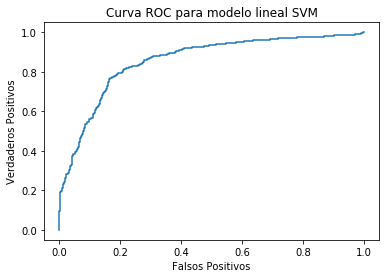

In [213]:
plt.plot(fpr,tpr)
plt.title("Curva ROC para modelo lineal SVM")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')

### Curva Precision-Recall

In [214]:
scores = grid1.decision_function(setValidacion)

precision, recall, thresholds = precision_recall_curve(y_val, scores)

Text(0.5, 1.0, 'Curva Precision-Recall para modelo Lineal SVM')

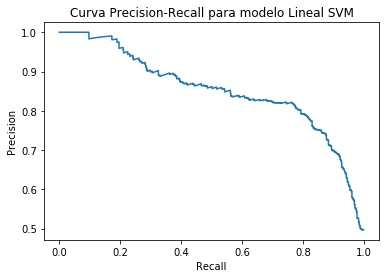

In [215]:
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para modelo Lineal SVM')

In [216]:
metrics.average_precision_score(y_val,scores)

0.8528649627039993

Se puede ver su precision promedio es $AVGPrecision=0.852$

## 1.2 Modelo Polinomial de grado 3

Ahora probamos con el modelo polinomial de grado 3, en este caso se prueban dos parametros $C$, y $\gamma$, que corresponden al parametro de regularización y el coeficiente del kernel. El primer parametro corresponde al que se vio anteriormente, y el segundo corresponde al peso que tiene los valores del input. Se escogieron los valores de $C$ de $10^{-3}$ hasta $10^{0}$. Para $\gamma$ se escogieron los valores de $0.1$ hasta $0.9$.

Para el parametro C como el parametro $\gamma$ se usan 4 parametros distintos y de estos se escoge el mejor.

In [309]:
parameters = {'gamma':[0.1, 0.2, 0.5, 0.9], 'C':[0.001,0.01,0.1,1]}

In [310]:
svc = svm.SVC(kernel='poly',degree=3, probability=False)
grid2 = GridSearchCV(svc, param_grid=parameters, cv=5)

In [311]:
grid2.fit(setEntrenamiento, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.1, 0.2, 0.5, 0.9]})

In [312]:
predictions = grid2.predict(setValidacion)

In [313]:
confusion_matrix(y_val,predictions)

array([[524,  80],
       [132, 464]], dtype=int64)

Tambien veremos la version normalizada.

In [314]:
confusion_matrix(y_val,predictions, normalize='true')

array([[0.86754967, 0.13245033],
       [0.22147651, 0.77852349]])

### Curva ROC

In [315]:
scores = grid2.decision_function(setValidacion)
scores

array([-1.57451348, -0.37792582, -1.12222496, ...,  0.06553344,
       12.68730574,  0.13727215])

In [316]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, scores)
metrics.auc(fpr, tpr)

0.8884200408907064

Podemos ver que el AUC para el modelo polinomial es más alto que para el modelo lineal, dando un $AUC=0.888$.

Text(0, 0.5, 'Verdaderos Positivos')

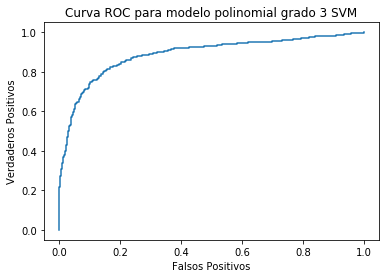

In [317]:
plt.plot(fpr,tpr)
plt.title("Curva ROC para modelo polinomial grado 3 SVM")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')

Posee una curva muy cercana a los ejes, salvo por la esquina que es donde más se aleja.

### Curva Precision-Recall

In [318]:
scores = grid2.decision_function(setValidacion)

precision, recall, thresholds = precision_recall_curve(y_val, scores)

Text(0.5, 1.0, 'Curva Precision-Recall para modelo polinomial grado 3 SVM')

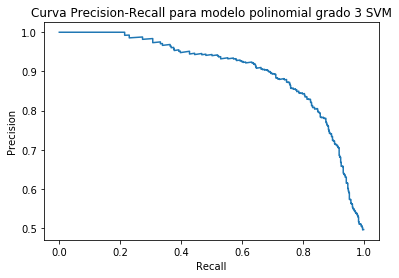

In [319]:
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para modelo polinomial grado 3 SVM')

In [320]:
metrics.average_precision_score(y_val,scores)

0.9016769196806762

Aqui es donde realmente se ve la diferencia con el modelo lineal, obteniendo un $AVGPrecision=0.902$, que es mas alto que el modelo lineal.

## 1.3 Modelo Polinomial de grado 5

Aqui se escogieron los mismos parametros que con el polinomio de grado 3, tanto para $C$ como para $\gamma$.

In [297]:
parameters = {'gamma':[0.1, 0.2, 0.4, 0.9], 'C':[0.001,0.01,0.1,1]}

In [298]:
svc = svm.SVC(kernel='poly',degree=5, probability=False)
grid3 = GridSearchCV(svc, param_grid=parameters, cv=5)

In [299]:
grid3.fit(setEntrenamiento, y_train)

GridSearchCV(cv=5, estimator=SVC(degree=5, kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.1, 0.2, 0.4, 0.9]})

In [300]:
predictions = grid3.predict(setValidacion)

In [301]:
confusion_matrix(y_val, predictions)

array([[529,  75],
       [148, 448]], dtype=int64)

Ahora su version normalizada

In [302]:
confusion_matrix(y_val,predictions, normalize='true')

array([[0.87582781, 0.12417219],
       [0.24832215, 0.75167785]])

Se ve que este clasificador posee un problema para clasificar los negativos, clasificandolos como positivos gran parte del tiempo.

### Curva ROC

In [303]:
scores = grid3.decision_function(setValidacion)
scores

array([ -2.85670293,  -0.74161363,  -4.3258417 , ...,  -1.00140425,
       291.53529712,  -0.4510646 ])

In [304]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, scores)
metrics.auc(fpr, tpr)

0.860682697008756

Sin embargo vemos que con el modelo de grado 5, los resultados son peores que con el polinomio de grado 3, dando un $AUC=0.860$.

Text(0, 0.5, 'Verdaderos Positivos')

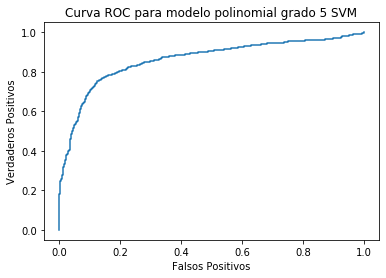

In [308]:
plt.plot(fpr,tpr)
plt.title("Curva ROC para modelo polinomial grado 5 SVM")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')

Sin embargo se ve que su curva está mucho más alejada que la curva del polinomial de grado 3, lo que es coherente dado los resultados del clasificador.

### Curva Precision-Recall

Text(0.5, 1.0, 'Curva Precision-Recall para modelo polinomial grado 5 SVM')

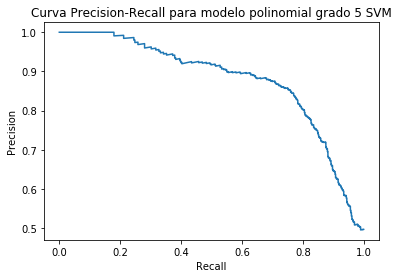

In [306]:
precision, recall, thresholds = precision_recall_curve(y_val, scores)

plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para modelo polinomial grado 5 SVM')

Su curva Precision-Recall tambien se aleja de los bordes.

In [307]:
metrics.average_precision_score(y_val,scores)

0.8782541543180057

Mirando su $AVGPrecision=0.878$ se puede ver que dentro de todo posee buenos resultados, pero no supera el valor del polinomio de grado 3.

## 1.4 Modelo RBF

Aqui poseemos los mismos parametros que con el caso polinomial, con la diferencia que aqui tomamos 5 valores de $C$. Se escogen valores de C de entre $10^{-4}$ hasta $10^{0}$. Para $\gamma$ se tomaron valores de $10^{-4}$ hasta $10^{-1}$.

In [234]:
parameters = {'gamma':[0.0001,0.001,0.01,0.1], 'C':[0.0001,0.001,0.01,0.1,1]}

In [235]:
svc = svm.SVC(kernel='rbf', probability=False)

In [236]:
grid4 = GridSearchCV(svc, param_grid=parameters, cv=5)
grid4.fit(setEntrenamiento, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [237]:
predictions = grid.predict(setValidacion)

In [238]:
confusion_matrix(y_val, predictions)

array([[532,  72],
       [113, 483]], dtype=int64)

Ahora su version normalizada.

In [239]:
confusion_matrix(y_val,predictions, normalize='true')

array([[0.8807947 , 0.1192053 ],
       [0.18959732, 0.81040268]])

### Curva ROC

In [240]:
scores = grid4.decision_function(setValidacion)
scores

array([-1.04281901, -0.48363572, -0.99933606, ..., -0.59869436,
        1.38877277,  0.4008783 ])

In [241]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, scores)
metrics.auc(fpr, tpr)

0.917285212676119

Vemos que se obtiene el puntaje más alto de todos con $AUC=0.917$, que es mayor al del mejor modelo anterior, el polinomial de grado 3.

Text(0, 0.5, 'Verdaderos Positivos')

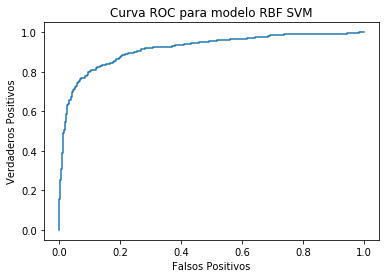

In [242]:
plt.plot(fpr,tpr)
plt.title("Curva ROC para modelo RBF SVM")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')

Se ve tambien que la curva ROC se acerca mucho a los ejes salvo en la parte de la esquina.

### Curva Precision-Recall

Text(0.5, 1.0, 'Curva Precision-Recall para modelo RBF SVM')

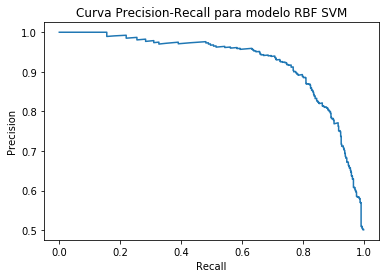

In [243]:
precision, recall, thresholds = precision_recall_curve(y_val, scores)

plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para modelo RBF SVM')

In [244]:
metrics.average_precision_score(y_val,scores)

0.925147498713088

Su valor es el mas alto de todos con $AVGPrecision=0.925$.

## 2. Testing con el Set de Testing

Se ve que de los 4 modelos, el RBF es el que posee mejores resultados, por lo tanto se escojera a este para clasificar los datos del testing.

In [245]:
predictions = grid4.predict(setTesting)

In [246]:
confusion_matrix(y_test,predictions)

array([[548,  62],
       [139, 451]], dtype=int64)

In [247]:
confusion_matrix(y_test,predictions, normalize='true')

array([[0.89836066, 0.10163934],
       [0.23559322, 0.76440678]])

Se ve que los valores se asemejan a los usados con el set de Validacion.

### Curva ROC

In [248]:
scores = grid4.decision_function(setTesting)
scores

array([-1.45969665, -0.03628912, -1.78911831, ..., -1.60030342,
        1.1908384 ,  2.00686585])

In [249]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
metrics.auc(fpr, tpr)

0.9027063073075856

Se aprecia un $AUC=0.903$ que es menor obtenido con el set de Validacion, pero aun así un valor bastante bueno.

Text(0, 0.5, 'Verdaderos Positivos')

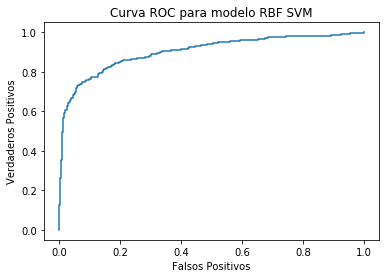

In [250]:
plt.plot(fpr,tpr)
plt.title("Curva ROC para modelo RBF SVM")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')

Su curva tambien es bastante parecida a la curva creada con el set de Validación.

### Curva Precision-Recall

Text(0.5, 1.0, 'Curva Precision-Recall para modelo RBF SVM')

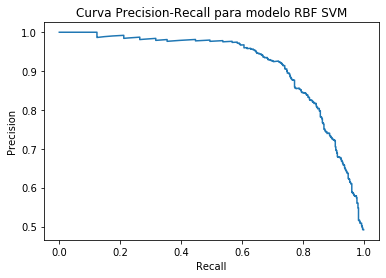

In [251]:
precision, recall, thresholds = precision_recall_curve(y_test, scores)

plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para modelo RBF SVM')

In [252]:
metrics.average_precision_score(y_test,scores)

0.916218495808173

El valor de $AVGPrecision$ es nuevamente mas bajo que el valor con el set de Validacion que fue de $0.925$, pero en sí es bastante alto.

### Comparando con otros modelos

In [263]:
predictionsModeloLineal=grid1.predict(setTesting)

In [264]:
predictionsModeloPoly3=grid2.predict(setTesting)

In [265]:
predictionsModeloPoly5=grid3.predict(setTesting)

Ahora comparamos los resultados con la matriz de confusion de cada uno con respecto al modelo 4.

In [266]:
confusion_matrix(y_test,predictions, normalize='true')

array([[0.89836066, 0.10163934],
       [0.23559322, 0.76440678]])

In [267]:
confusion_matrix(y_test, predictionsModeloLineal,normalize='true')

array([[0.8557377 , 0.1442623 ],
       [0.30169492, 0.69830508]])

In [268]:
confusion_matrix(y_test, predictionsModeloPoly3,normalize='true')

array([[0.86393443, 0.13606557],
       [0.23389831, 0.76610169]])

In [270]:
confusion_matrix(y_test, predictionsModeloPoly5,normalize='true')

array([[0.87540984, 0.12459016],
       [0.27457627, 0.72542373]])

Comparando los 4 modelos, el que posee más TP es el modelo RBF, seguido del modelo Polinomial de grado 5. Respecto a los TN, el modelo que más tiene es el modelo Polinomial3 , y lo sigue el RBF.

Ahora comparando los FP y FN, el modelo con menor cantidad de ellos es el modelo RBF, con $FP=0.102$, y con $FN=0.236$. Mientras que el modelo polinomial de grado 3 posee $FP=0.136$ y $FN=0.233$. Es decir el modelo RBF reduce la cantidad de Falsos Positivos, mientras que el modelo polinomial de grado 3 reduce los Falsos Negativos.

Ahora comparemos sus curvas ROC y Precision Recall.

In [276]:
scoresRBF = grid4.decision_function(setTesting)

In [278]:
scoresModeloLineal = grid1.decision_function(setTesting)

In [279]:
scoresModeloPoly3 = grid2.decision_function(setTesting)

In [280]:
scoresModeloPoly5= grid3.decision_function(setTesting)

Comparamos primero su AUC con cada modelo.

In [277]:
fprRBF, tprRBF, thresholdsRBF = metrics.roc_curve(y_test, scoresRBF)
metrics.auc(fprRBF, tprRBF)

0.9027063073075856

In [281]:
fprML, tprML, thresholdsML = metrics.roc_curve(y_test, scoresModeloLineal)
metrics.auc(fprML, tprML)

0.8431036398999723

In [282]:
fprMP3, tprMP3, thresholdsMP3 = metrics.roc_curve(y_test, scoresModeloPoly3)
metrics.auc(fprMP3, tprMP3)

0.8828063350930814

In [283]:
fprMP5, tprMP5, thresholdsMP5 = metrics.roc_curve(y_test, scoresModeloPoly5)
metrics.auc(fprMP5, tprMP5)

0.8524145595998887

Se ven que estos resultados coinciden con los resultados dados con el Set de Validación, obteniendo mayor AUC el modelo RBF, seguido por el modelo Polinomial de grado 3.

Ahora veamos las curvas:

Text(0, 0.5, 'Verdaderos Positivos')

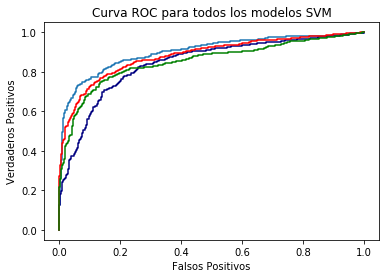

In [287]:
plt.plot(fprRBF,tprRBF)
plt.plot(fprML,tprML,'navy')
plt.plot(fprMP3,tprMP3,'red')
plt.plot(fprMP5,tprMP5,'green')
plt.title("Curva ROC para todos los modelos SVM")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')

La curva celeste que corresponde a la curva del RBF obtiene los mejores resultados, seguido por la curva roja que corresponde al modelo polinomial de grado 3. Despues continuado por el modelo polinomial de grado 5 y por ultimo el azul oscuro que corresponde al modelo lineal.

Todos estos resultados coinciden con los presentados anteriormente.

Antes veamos el AVGPrecision de cada modelo:

In [291]:
metrics.average_precision_score(y_test,scoresRBF)

0.916218495808173

In [293]:
metrics.average_precision_score(y_test,scoresModeloLineal)

0.8459191336995344

In [294]:
metrics.average_precision_score(y_test,scoresModeloPoly3)

0.9003085103499744

In [295]:
metrics.average_precision_score(y_test,scoresModeloPoly5)

0.8761461424564264

De todos los modelos el que posee mejor $AVGPrecision$ es el modelo RBF como mostraban el set de Validacion. Seguido del modelo Poly de grado 3.

Ahora para la curva Precision-Recall:

In [288]:
precisionRBF, recallRBF, thresholdsRBF = precision_recall_curve(y_test, scoresRBF)
precisionML, recallML, thresholdsML = precision_recall_curve(y_test, scoresModeloLineal)
precisionMP3, recallMP3, thresholdsMP3 = precision_recall_curve(y_test, scoresModeloPoly3)
precisionMP5, recallMP5, thresholdsMP5 = precision_recall_curve(y_test, scoresModeloPoly5)

Text(0.5, 1.0, 'Curva Precision-Recall para todos los modelos SVM')

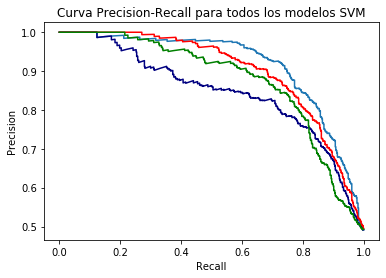

In [290]:
plt.plot(recallRBF,precisionRBF)
plt.plot(recallML,precisionML,'navy')
plt.plot(recallMP3,precisionMP3,'red')
plt.plot(recallMP5,precisionMP5,'green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para todos los modelos SVM')

Se puede ver que claramente que la curva Precision-Recall que más se acerca a los ejes, es la curva celeste correspondiendo al modelo RBF, seguido por la curva roja que es el modelo Polinomial de grado 3. Y por ultimo está el modelo lineal.

# Conclusiones

Se concluye que este tipo de problema si puede ser separable con un hiperplano obtenido a partir de un modelo SVM, en particular el kernel RBF es el que posee mejores resultados. Tambien se concluye que los resultados obtenidos con el set de Validacion son un buen indicador de los resultados con el Set de Testing, puesto que con ambos set obtenieron resultados muy similares. Además dado con los resultados se asumió que el RBF sería el mejor clasificador para clasificar el set de Testing, y se demostró que esto sigue siendo cierto, pues fue el mejor en predecir de todos los clasificadores.

Además se demostro que este problema aunque se puede clasificar con un clasificador lineal con un 0.85 de AUC, dado el hecho que se puede mejorar los resultados con un clasificador no lineal sin que este se sobreajuste, demuestra que el problema se puede considerar no lineal. Con esto se muestra la fortaleza que tiene el clasificador SVM para resolver problemas no lineales.

Por ultimo respecto a la experiencia, se aprendio que un escalador es una herramienta muy util y un paso muy necesario, en particular con los clasificadores polinomiales, puesto que estos sin escalador demoraban horas pero con este demoraban minutos. Además se aprendió que la importancia de los parametros para mejorar los resultados, dado que al variar los parametros de RBF y polinomial los resultados cambiaban aunque sea un poco.